# Laboratorio di simulazione numerica

In [45]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import math
import string

### Exercise 02.1

In [46]:
prefix = "exercise02-1/"

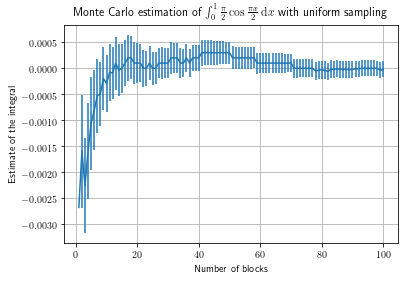

In [47]:
filename = prefix + "integral-uniform-sampling.dat"
integral_avg, integral_std = np.loadtxt(filename, skiprows = 1, unpack = True)
plt.errorbar(range(1, len(integral_avg) + 1), integral_avg - 1, yerr = integral_std)
plt.title(r"Monte Carlo estimation of $\int_0^1\frac{\pi}{2}\cos\frac{\pi x}{2}\,\mathrm{d}x$ with uniform sampling")
plt.xlabel("Number of blocks")
plt.ylabel("Estimate of the integral")
plt.grid(True)
plt.show()

For the *importance sampling* technique, I used the probability density function $\phi(x)=2(1-x)$ to sample the points on the unit inverval.

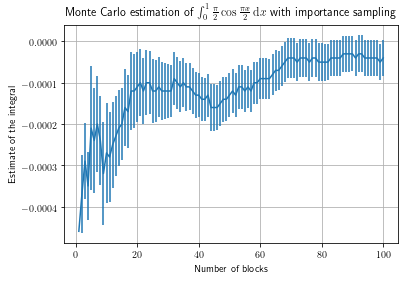

In [48]:
filename = prefix + "integral-importance-sampling.dat"
integral_avg, integral_std = np.loadtxt(filename, skiprows = 1, unpack = True)
plt.errorbar(range(1, len(integral_avg) + 1), integral_avg - 1, yerr = integral_std)
plt.title(r"Monte Carlo estimation of $\int_0^1\frac{\pi}{2}\cos\frac{\pi x}{2}\,\mathrm{d}x$ with importance sampling")
plt.xlabel("Number of blocks")
plt.ylabel("Estimate of the integral")
plt.grid(True)
plt.show()

### Exercise 02.2

In [20]:
prefix = "exercise02-2/"

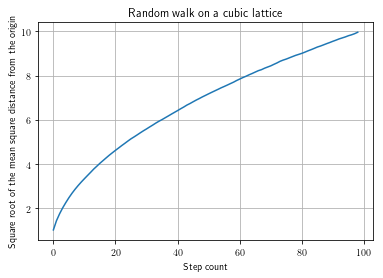

In [40]:
filename = prefix + "cubic-random-walk.dat"
msd = np.loadtxt(filename, skiprows = 1)
plt.plot(msd)
plt.title("Random walk on a cubic lattice")
plt.xlabel("Step count")
plt.ylabel("Square root of the mean square distance from the origin")
plt.grid(True)
plt.show()

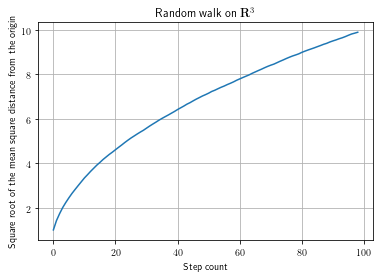

In [43]:
filename = prefix + "continuous-random-walk.dat"
msd = np.loadtxt(filename, skiprows = 1)
plt.plot(msd)
plt.title(r"Random walk on $\mathbf{R}^3$")
plt.xlabel("Step count")
plt.ylabel("Square root of the mean square distance from the origin")
plt.grid(True)
plt.show()